In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode,iplot,plot
import plotly.express as px
cf.go_offline()
init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')

# Data Collecting

In [34]:
data = pd.read_csv('data/ipl.csv')


# Get Familiar with the Data

In [35]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53502 entries, 0 to 53501
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             53502 non-null  int64  
 1   date            53502 non-null  object 
 2   venue           53502 non-null  object 
 3   bat_team        53502 non-null  object 
 4   bowl_team       53502 non-null  object 
 5   batsman         53502 non-null  object 
 6   bowler          53502 non-null  object 
 7   runs            53502 non-null  int64  
 8   wickets         53502 non-null  int64  
 9   overs           53502 non-null  float64
 10  runs_last_5     53502 non-null  int64  
 11  wickets_last_5  53502 non-null  int64  
 12  striker         53502 non-null  int64  
 13  non-striker     53502 non-null  int64  
 14  total           53502 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 6.1+ MB


In [37]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000
mean,217.142256,73.541494,2.439479,9.777423,32.624575,1.123042,24.452656,8.604931,158.445404
std,125.139875,48.054472,2.021092,5.772374,14.734729,1.050518,19.848411,10.396842,29.231049
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,109.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,140.000000
50%,217.000000,69.000000,2.000000,9.600000,33.000000,1.000000,20.000000,5.000000,159.000000
75%,325.000000,108.000000,4.000000,14.600000,42.000000,2.000000,35.000000,12.000000,178.000000
max,434.000000,263.000000,10.000000,19.600000,94.000000,7.000000,175.000000,82.000000,263.000000


# Exploratory  Data Analysis

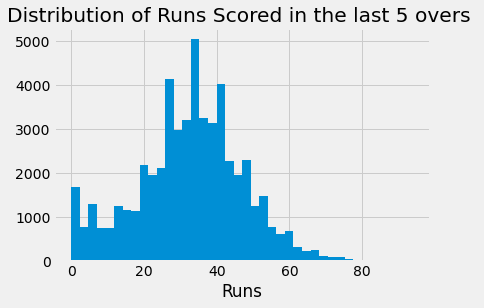

In [38]:
data['runs_last_5'].hist(bins=40)
plt.title('Distribution of Runs Scored in the last 5 overs ')
plt.xlabel('Runs')
plt.show()

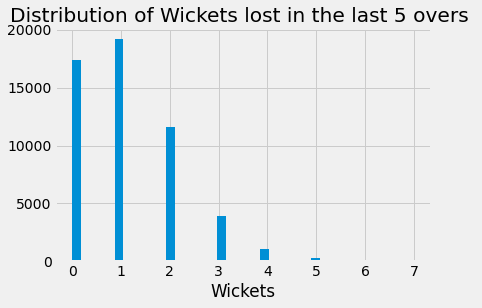

In [39]:
data['wickets_last_5'].hist(bins=40)
plt.title('Distribution of Wickets lost in the last 5 overs ')
plt.xlabel('Wickets')
plt.show()

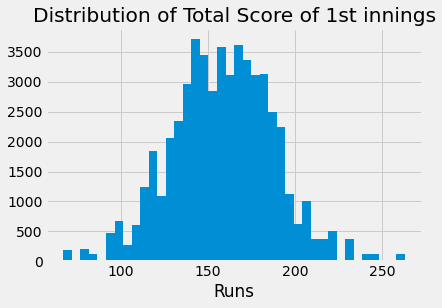

In [40]:
data['total'].hist(bins=40)
plt.title('Distribution of Total Score of 1st innings')
plt.xlabel('Runs')
plt.show()

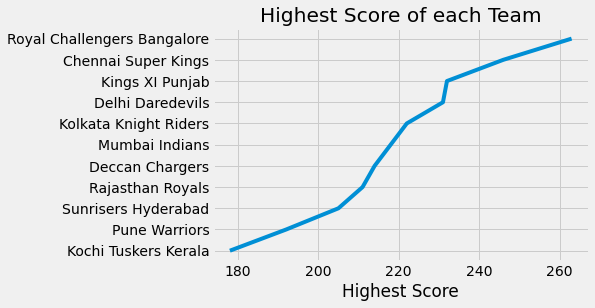

In [41]:

x = data.groupby('bat_team').max()['total'].sort_values().index
y = data.groupby('bat_team').max()['total'].sort_values().values
plt.plot(y,x)
plt.xticks(rotation=0)
plt.xlabel('Highest Score')
plt.title('Highest Score of each Team')
plt.show()

# Data Cleaning
## In order to pass the values we need them to be numeric so we will 

In [42]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [43]:
clean_df = data[['runs','wickets','overs','runs_last_5','wickets_last_5','striker','non-striker', 'total']]

In [44]:
clean_df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,0,0.1,1,0,0,0,222
1,1,0,0.2,1,0,0,0,222
2,2,0,0.2,2,0,0,0,222
3,2,0,0.3,2,0,0,0,222
4,2,0,0.4,2,0,0,0,222


# Deciding the Features and Labels and Splitting them into training and testing data

In [45]:
from sklearn.model_selection import train_test_split
X = clean_df.drop('total',axis=1)
y = clean_df['total']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Creating a model and training the model
## Linear Model

In [46]:
from sklearn.linear_model import LinearRegression

linmodel = LinearRegression()

linmodel.fit(X_train,y_train)

LinearRegression()

# Predicting from the Model using training Data

In [47]:
predictions = linmodel.predict(X_test)
b = linmodel.intercept_
print(f"Y = {b} + {linmodel.coef_[0]}*runs + {linmodel.coef_[1]}*wickets + {linmodel.coef_[2]}*overs ........")

Y = 158.8207586217059 + 0.9453911256684724*runs + -4.521135518142727*wickets + -6.081669569804781*overs ........


In [48]:
coeffecient_df = pd.DataFrame(linmodel.coef_,X.columns,columns=['Coeffecient'])
coeffecient_df

,Coeffecient
runs,0.945391
wickets,-4.521136
overs,-6.081670
runs_last_5,0.109225
wickets_last_5,-1.988837
striker,0.003388
non-striker,-0.107933


In [49]:
R_square_value = linmodel.score(X_test,y_test)
R_square_value

0.5166897401657116

In [50]:
custom_input = [145,4,16,45,2,23,67]

custom_output = print(round(*linmodel.predict(np.array([custom_input]))))

174


## Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
def score(max_depth):
    '''\
        This will be returning the score for every max depth value
    '''
    dtr = DecisionTreeRegressor(max_depth=max_depth)
    dtr.fit(X_train,y_train)
    return dtr.score(X_test,y_test)

In [53]:
depth_list = [i for i in range(2,101,2)]
score_list = []

for i in depth_list:
    score_list.append(score(i))
    


In [54]:
score_depth_df = pd.DataFrame(dict(MaxDepth=depth_list,Score=score_list))
score_depth_df.head()

,MaxDepth,Score
0,2,0.235989
1,4,0.352383
2,6,0.445237
3,8,0.499481
4,10,0.536510


In [55]:
fig = px.line(score_depth_df, x="MaxDepth", y="Score", title='Score vs Max_Depth')
fig.show()

## Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
def SCORE(max_depth):
    rfr = RandomForestRegressor(max_depth=max_depth)
    rfr.fit(X_train,y_train)
    return rfr.score(X_train,y_train)
    

In [58]:
DEPTH_LIST = [i for i in range(2,101,2)]

SCORE_LIST = []

for i in DEPTH_LIST:
    SCORE_LIST.append(SCORE(i))

In [59]:
SCORE_DEPTH_DF = pd.DataFrame(dict(MaxDepth=DEPTH_LIST,Score=SCORE_LIST))

fig = px.line(SCORE_DEPTH_DF, x="MaxDepth", y="Score", title='Score vs Max_Depth')
fig.show()

In [62]:
rfr = RandomForestRegressor(max_depth=92)
rfr.fit(X_train,y_train)


RandomForestRegressor(max_depth=92)

In [63]:
custom_input_rfr = [145,4,16,45,2,23,67]
custom_output_rfr = rfr.predict(np.array([custom_input_rfr]))
custom_output_rfr

array([183.94])